#                                      MY ML PROJECT 


## Bank Marketing Campaign Data

In [214]:
import numpy as np
import pandas as pd
import matplotlib as pt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


In [215]:
bank=pd.read_csv('bank-marketing.csv')

In [216]:
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58,management,100000,married,tertiary,yes,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,60000,single,secondary,yes,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,120000,married,secondary,yes,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,20000,married,unknown,no,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,0,single,unknown,no,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [217]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 19 columns):
age          45211 non-null int64
job          45211 non-null object
salary       45211 non-null int64
marital      45211 non-null object
education    45211 non-null object
targeted     45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
response     45211 non-null object
dtypes: int64(8), object(11)
memory usage: 6.6+ MB


In [218]:
bank.isnull().sum(axis=0)

age          0
job          0
salary       0
marital      0
education    0
targeted     0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
response     0
dtype: int64

In [219]:
bank.describe()

,age,salary,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,57006.171065,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,32085.718415,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,0.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,20000.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,60000.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,70000.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,120000.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [220]:
corr=bank.corr(method='pearson')
corr

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


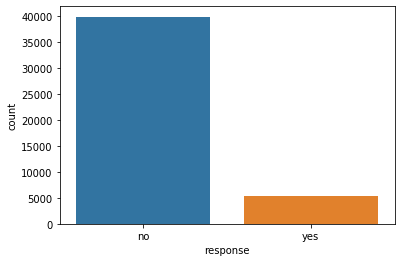

In [221]:
sns.countplot(x='response',data=bank)

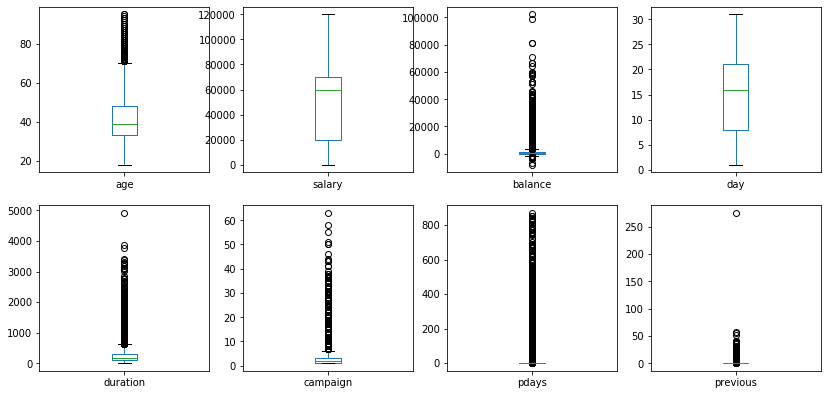

In [222]:
bank.plot(kind='box',subplots=True,layout=(4,4),figsize=[14,14])
plt.show()

In [223]:
bank.groupby('response').mean()

,age,salary,balance,day,duration,campaign,pdays,previous
response,,,,,,,,
no,40.838986,56772.456290,1303.714969,15.892290,221.182806,2.846350,36.421372,0.502154
yes,41.670070,58770.277935,1804.267915,15.158253,537.294574,2.141047,68.702968,1.170354


### describing pdays column and taking note of mean, median and min values

In [224]:
bank['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [225]:
bank['pdays'].median()

-1.0

#### the value median= -1  indicates that the client was not contacted in the previous campaign by comparing the feature pdays with previous

### describing pdays again after filtering the data with the observation of pdays median values 

In [226]:
bank1 = bank[bank.pdays > 0]
bank1['pdays'].describe()

count    8257.000000
mean      224.577692
std       115.344035
min         1.000000
25%       133.000000
50%       194.000000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

In [227]:
bank1['pdays'].median()

194.0

### plotting horizontal bar graph with the median values of balance for each education level

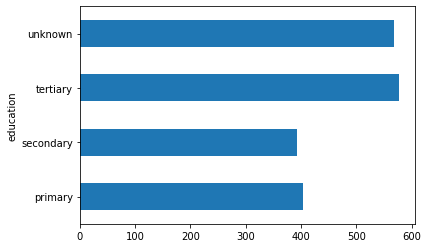

In [228]:
bank.groupby(['education'])['balance'].median().plot(kind='barh')

#### tertiary has the highest median

### plotting a boxplot for pdays

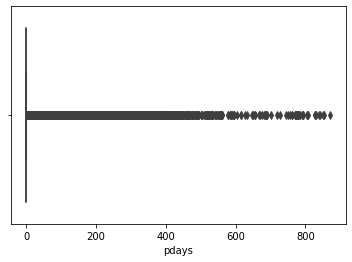

In [229]:
sns.boxplot('pdays',data = bank)

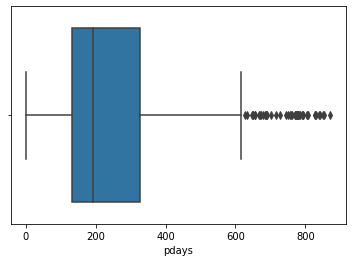

In [230]:
sns.boxplot('pdays',data = bank1)

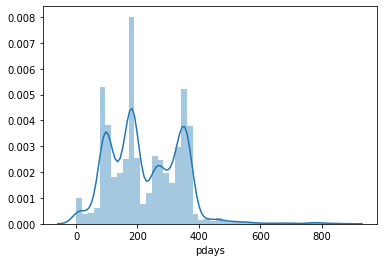

In [231]:
sns.distplot(bank1['pdays'])

#### there are outliers in pdays feature after filtering the data

### EXPLORATORY DATA ANALYSIS

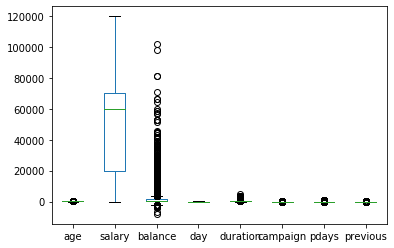

In [232]:
bank.plot.box()

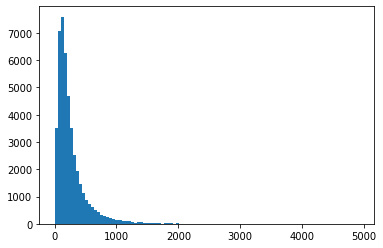

In [233]:
plt.hist((bank.duration),bins=100)
plt.show()

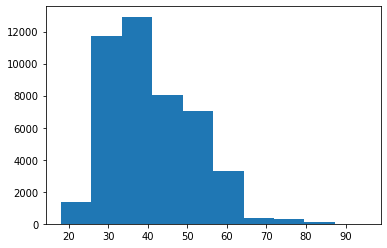

In [234]:
plt.hist(bank.age,bins=10)
plt.show()

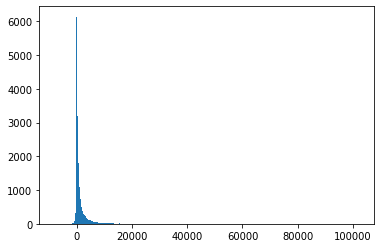

In [235]:
plt.hist(bank.balance,bins=1000)
plt.show()

#### above graphs shows that data is left skewed for the above features

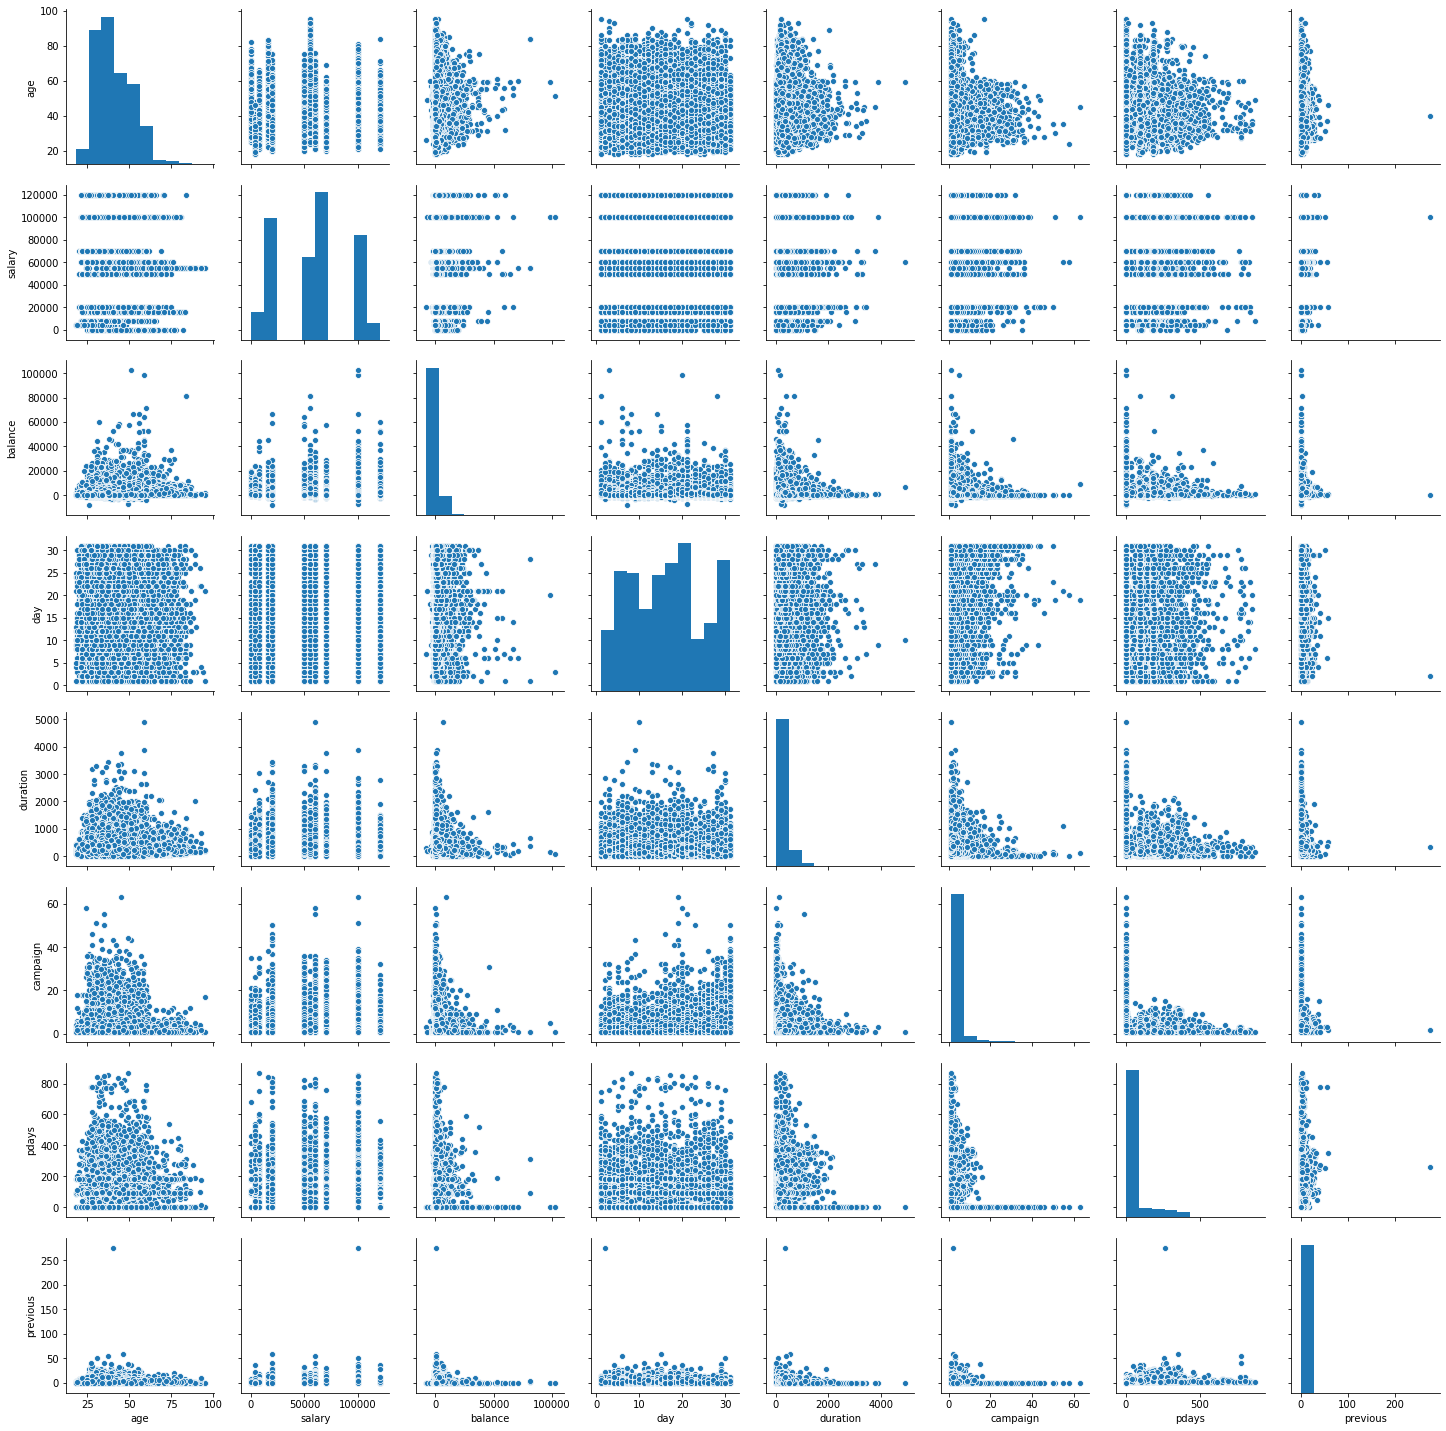

In [139]:
sns.pairplot(bank)

In [236]:
bank.select_dtypes(exclude=[object]).head()

,age,salary,balance,day,duration,campaign,pdays,previous
0,58,100000,2143,5,261,1,-1,0
1,44,60000,29,5,151,1,-1,0
2,33,120000,2,5,76,1,-1,0
3,47,20000,1506,5,92,1,-1,0
4,33,0,1,5,198,1,-1,0


In [237]:
bank.select_dtypes(exclude=[np.number]).head()

,job,marital,education,targeted,default,housing,loan,contact,month,poutcome,response
0,management,married,tertiary,yes,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,yes,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,yes,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,no,unknown,may,unknown,no


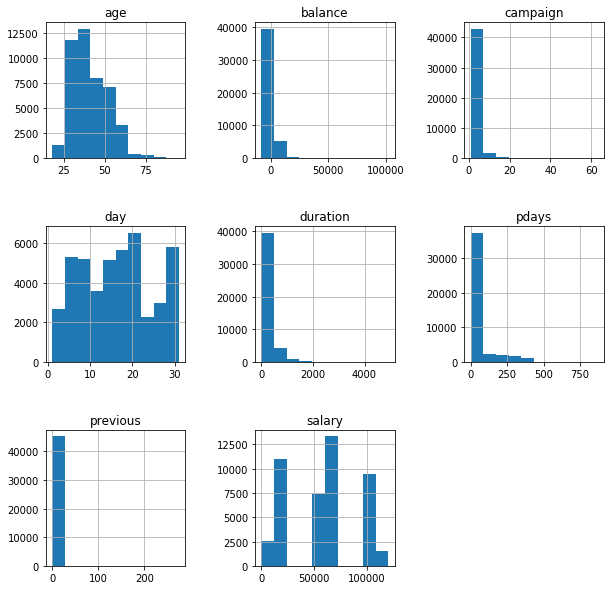

In [238]:
num_vars= ['age', 'salary', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
bank.hist(column=num_vars,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

### Bi-Variate Analysis

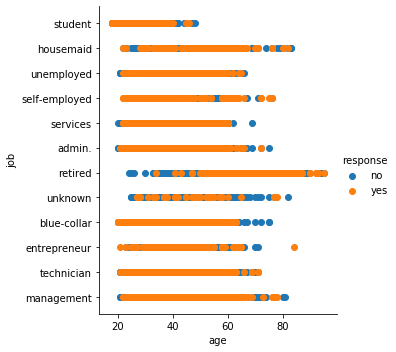

In [239]:
sns.FacetGrid(bank,hue='response',size=5).map(plt.scatter,'age','job').add_legend()

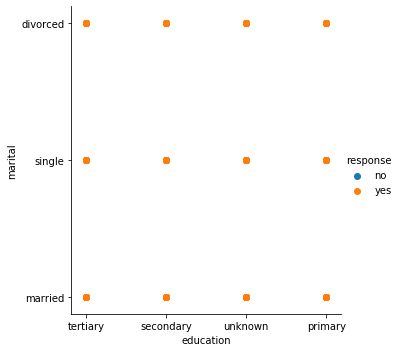

In [240]:
sns.FacetGrid(bank,hue='response',size=5).map(plt.scatter,'education','marital').add_legend()

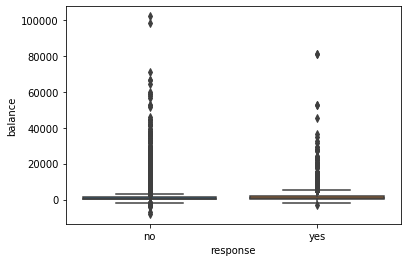

In [241]:
sns.boxplot(x='response',y='balance',data=bank)
plt.show()

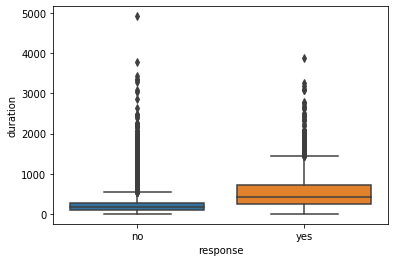

In [242]:
sns.boxplot(x='response',y='duration',data=bank)
plt.show()

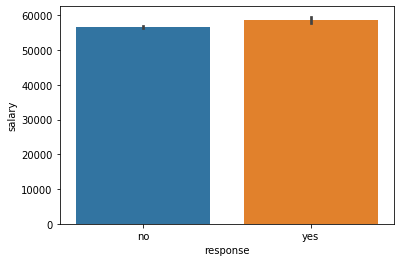

In [243]:
sns.barplot(x='response',y='salary',data=bank)
plt.show()

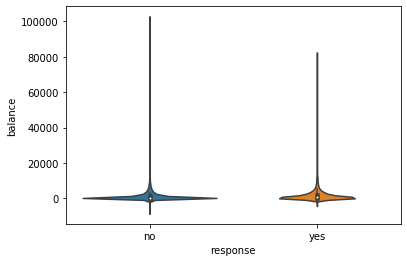

In [244]:
sns.violinplot(x='response',y='balance',data=bank,size=8)
plt.show()

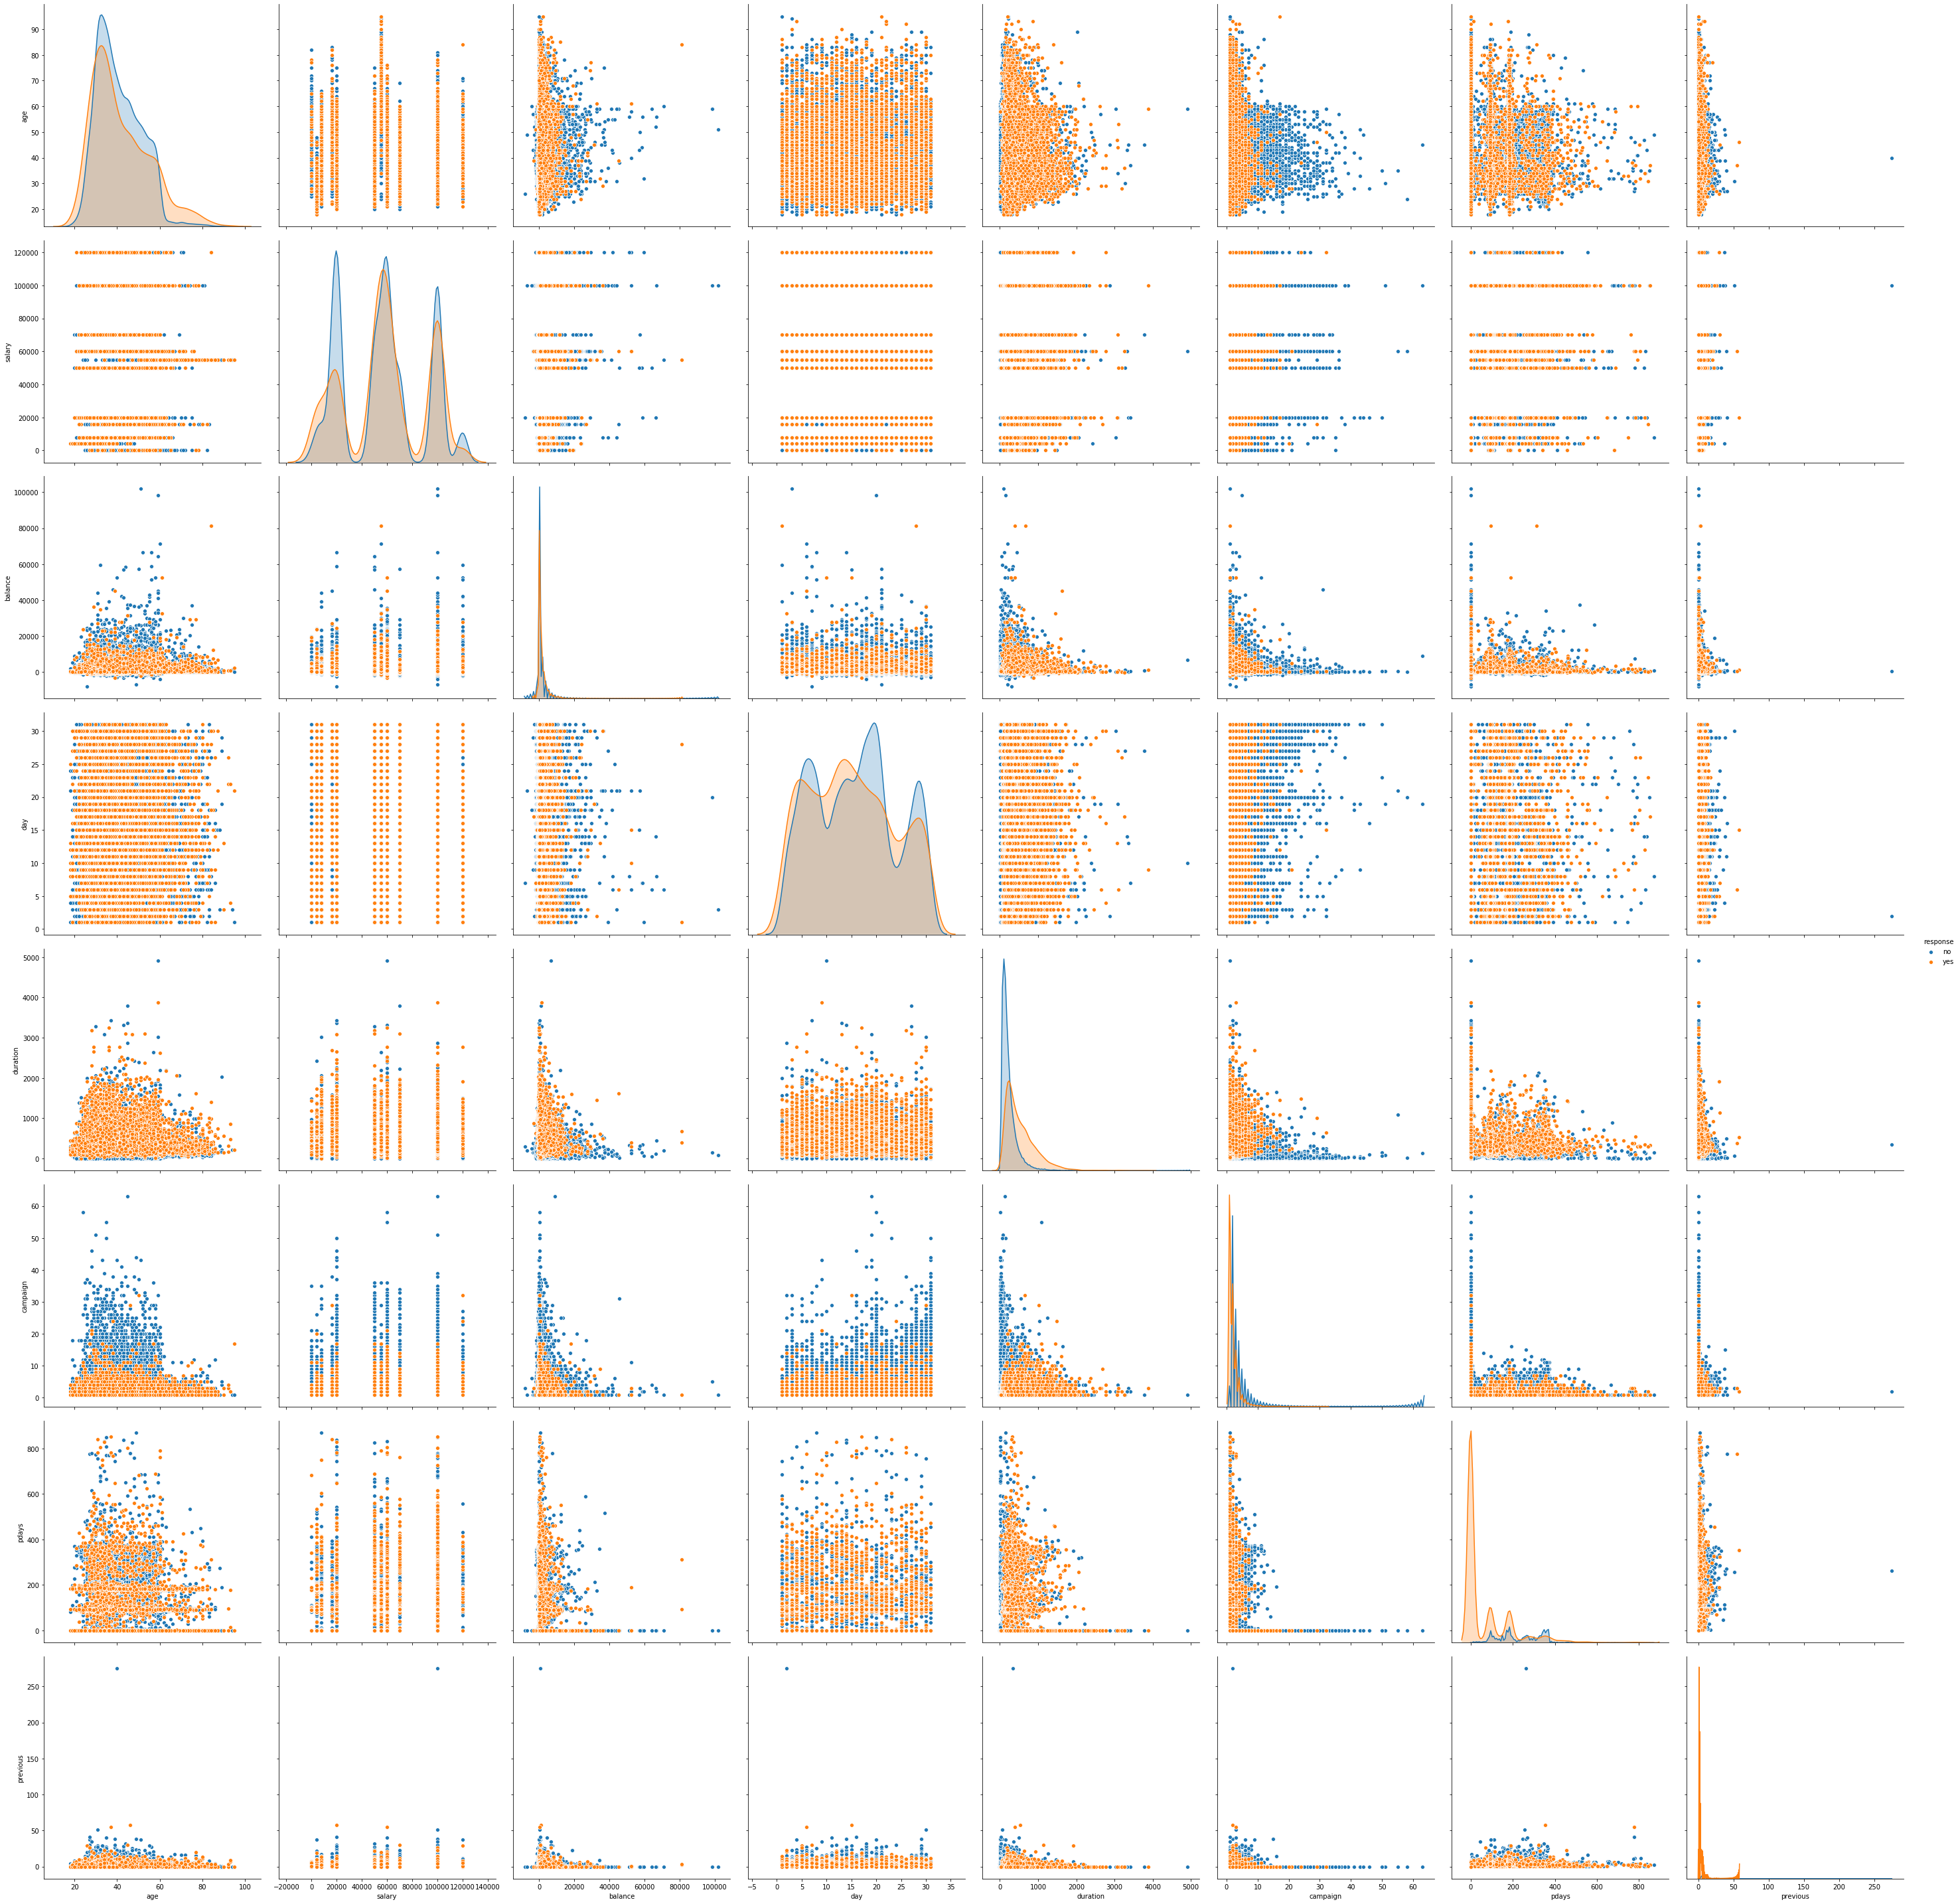

In [149]:
sns.pairplot(bank,hue='response',size=5)

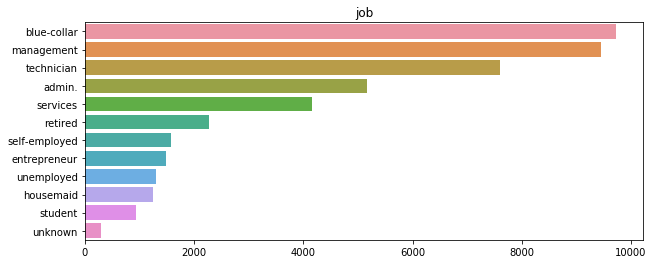

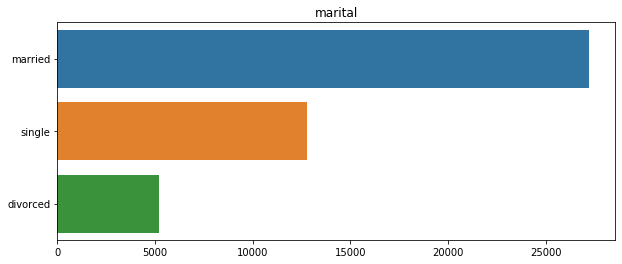

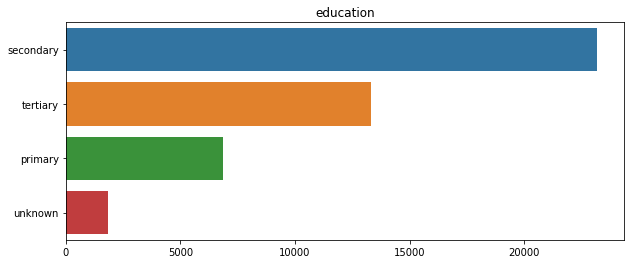

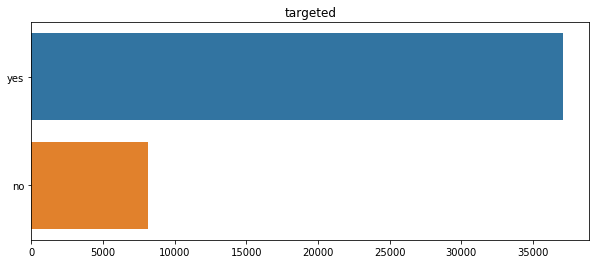

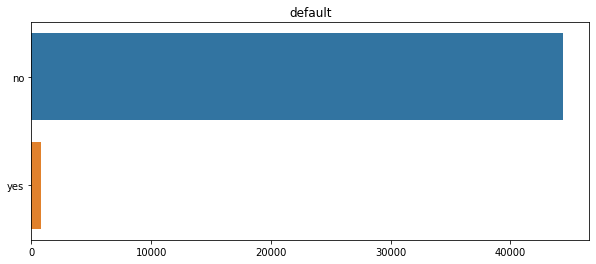

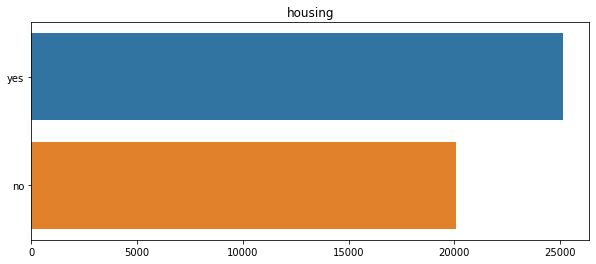

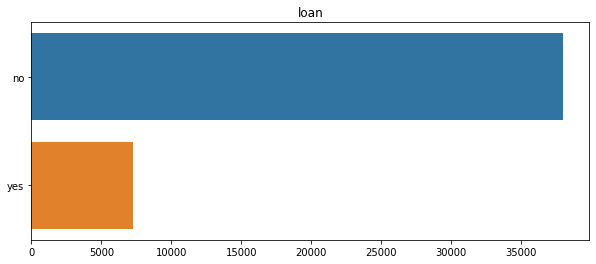

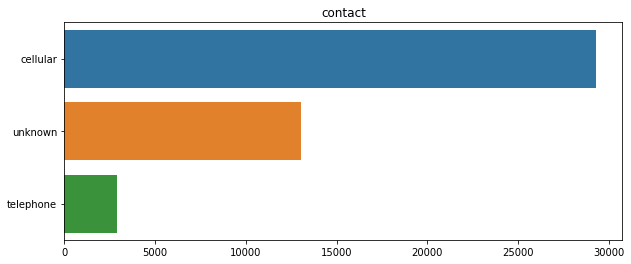

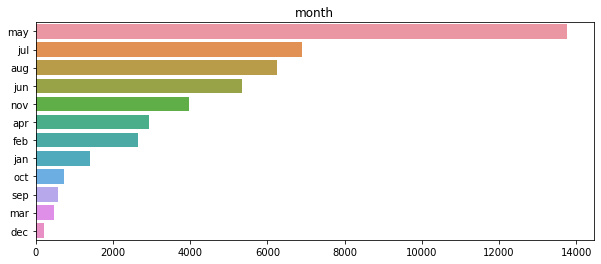

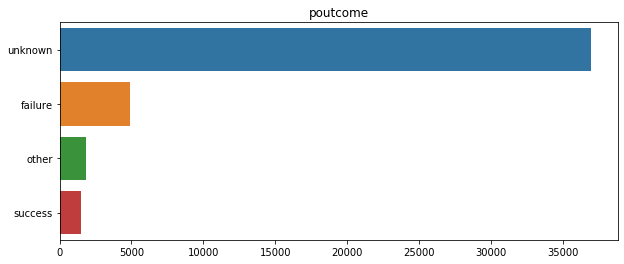

In [245]:
cat_vars = ['job', 'marital', 'education', 'targeted', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome'] 
for col in cat_vars:
    plt.figure(figsize=(10,4))
    sns.barplot(bank[col].value_counts().values, bank[col].value_counts().index)
    plt.title(col)
    plt.show

In [246]:
bank.corr()

,age,salary,balance,day,duration,campaign,pdays,previous
age,1.000000,0.024357,0.097783,-0.009120,-0.004648,0.004760,-0.023758,0.001288
salary,0.024357,1.000000,0.055469,0.027864,-0.009937,0.015005,-0.014968,0.014564
balance,0.097783,0.055469,1.000000,0.004503,0.021560,-0.014578,0.003435,0.016674
day,-0.009120,0.027864,0.004503,1.000000,-0.030206,0.162490,-0.093044,-0.051710
duration,-0.004648,-0.009937,0.021560,-0.030206,1.000000,-0.084570,-0.001565,0.001203
campaign,0.004760,0.015005,-0.014578,0.162490,-0.084570,1.000000,-0.088628,-0.032855
pdays,-0.023758,-0.014968,0.003435,-0.093044,-0.001565,-0.088628,1.000000,0.454820
previous,0.001288,0.014564,0.016674,-0.051710,0.001203,-0.032855,0.454820,1.000000


In [248]:
pd.crosstab(bank['pdays'],bank['poutcome'], values=bank['age'], aggfunc='count', normalize=True).head()

poutcome,failure,other,success,unknown
pdays,,,,
-1,0.000000,0.000000,0.000000,0.817367
1,0.000066,0.000066,0.000199,0.000000
2,0.000022,0.000774,0.000022,0.000000
3,0.000000,0.000022,0.000000,0.000000
4,0.000022,0.000000,0.000022,0.000000


In [249]:
sig_cat_vars = ['education','job','contact','poutcome']
for var in sig_cat_vars:
    bank[var + '_un'] = (bank[var] == 'unknown').astype(int)

In [250]:
def cross_tab(bank,f1,f2):
    jobs=list(bank[f1].unique())
    edu=list(bank[f2].unique())
    dataframes=[]
    for e in edu:
        dfe=bank[bank[f2]==e]
        dfejob=dfe.groupby(f1).count()[f2]
        dataframes.append(dfejob)
    xx=pd.concat(dataframes,axis=1)
    xx.columns=edu
    xx=xx.fillna(0)
    return xx

In [251]:
cross_tab(bank,'job','education')

,tertiary,secondary,unknown,primary
job,,,,
admin.,572,4219,171,209
blue-collar,149,5371,454,3758
entrepreneur,686,542,76,183
housemaid,173,395,45,627
management,7801,1121,242,294
retired,366,984,119,795
self-employed,833,577,39,130
services,202,3457,150,345
student,223,508,163,44


In [252]:
bank['job'][bank['age']>60].value_counts()

retired          875
management       105
housemaid         56
technician        30
blue-collar       26
admin.            25
self-employed     24
unknown           22
entrepreneur      13
unemployed        10
services           2
Name: job, dtype: int64

In [253]:

bank.loc[(bank['age']>60) & (bank['job']=='unknown'), 'job'] = 'retired'
bank.loc[(bank['education']=='unknown') & (bank['job']=='management'), 'education'] = 'university.degree'
bank.loc[(bank['education']=='unknown') & (bank['job']=='services'), 'education'] = 'high.school'
bank.loc[(bank['education']=='unknown') & (bank['job']=='housemaid'), 'education'] = 'basic.4y'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.4y'), 'job'] = 'blue-collar'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.6y'), 'job'] = 'blue-collar'
bank.loc[(bank['job'] == 'unknown') & (bank['education']=='basic.9y'), 'job'] = 'blue-collar'
bank.loc[(bank['job']=='unknown') & (bank['education']=='professional.course'), 'job'] = 'technician'

In [254]:
cross_tab(bank,'job','education')

,tertiary,secondary,unknown,primary,university.degree,high.school,basic.4y
admin.,572,4219,171.0,209,0.0,0.0,0.0
blue-collar,149,5371,454.0,3758,0.0,0.0,0.0
entrepreneur,686,542,76.0,183,0.0,0.0,0.0
housemaid,173,395,0.0,627,0.0,0.0,45.0
management,7801,1121,0.0,294,242.0,0.0,0.0
retired,371,989,130.0,796,0.0,0.0,0.0
self-employed,833,577,39.0,130,0.0,0.0,0.0
services,202,3457,0.0,345,0.0,150.0,0.0
student,223,508,163.0,44,0.0,0.0,0.0
technician,1968,5229,242.0,158,0.0,0.0,0.0


### Converting the 'response' variable into convenient form and  Handling the Categorical variables

In [255]:
def conver(x):
    return x.map({'no':0,'yes':1})
bank[['response']]=bank[['response']].apply(conver)
bank[['targeted']]=bank[['targeted']].apply(conver)
bank[['default']]=bank[['default']].apply(conver)
bank[['housing']]=bank[['housing']].apply(conver)
bank[['loan']]=bank[['loan']].apply(conver)

In [256]:
bank.head()

,age,job,salary,marital,education,targeted,default,balance,housing,loan,...,duration,campaign,pdays,previous,poutcome,response,education_un,job_un,contact_un,poutcome_un
0,58,management,100000,married,tertiary,1,0,2143,1,0,...,261,1,-1,0,unknown,0,0,0,1,1
1,44,technician,60000,single,secondary,1,0,29,1,0,...,151,1,-1,0,unknown,0,0,0,1,1
2,33,entrepreneur,120000,married,secondary,1,0,2,1,1,...,76,1,-1,0,unknown,0,0,0,1,1
3,47,blue-collar,20000,married,unknown,0,0,1506,1,0,...,92,1,-1,0,unknown,0,1,0,1,1
4,33,unknown,0,single,unknown,0,0,1,0,0,...,198,1,-1,0,unknown,0,1,1,1,1


In [257]:
bank=bank.drop('contact',axis=1)

In [258]:
dumm=['job','education','marital','month','poutcome']
for i in lst:
    dummy=pd.get_dummies(bank[i],drop_first=True)
    bank=pd.concat([bank,dummy],axis=1)
    bank.drop([i],axis=1,inplace=True)

In [259]:
bank.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
0,58,100000,1,0,2143,1,0,5,261,1,...,0,0,0,1,0,0,0,0,0,1
1,44,60000,1,0,29,1,0,5,151,1,...,0,0,0,1,0,0,0,0,0,1
2,33,120000,1,0,2,1,1,5,76,1,...,0,0,0,1,0,0,0,0,0,1
3,47,20000,0,0,1506,1,0,5,92,1,...,0,0,0,1,0,0,0,0,0,1
4,33,0,0,0,1,0,0,5,198,1,...,0,0,0,1,0,0,0,0,0,1


### PREDICTIVE MODELLING

### Train-Test Split

In [263]:
x=bank.drop('response',axis=1)
y=bank[['response']]

In [265]:
from sklearn.model_selection import train_test_split

In [266]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=100)

In [270]:
x_train.head()

,age,salary,targeted,default,balance,housing,loan,day,duration,campaign,...,jul,jun,mar,may,nov,oct,sep,other,success,unknown
18391,40,20000,1,0,4853,0,0,31,234,2,...,1,0,0,0,0,0,0,0,0,1
13056,26,50000,1,0,-378,0,1,8,165,1,...,1,0,0,0,0,0,0,0,0,1
13415,52,60000,1,0,3440,1,0,9,194,1,...,1,0,0,0,0,0,0,0,0,1
21022,39,100000,0,0,668,0,0,14,297,2,...,0,0,0,0,0,0,0,0,0,1
24510,50,100000,1,0,830,0,0,17,71,1,...,0,0,0,0,1,0,0,0,0,0


### LOGISTIC REGRESSION

In [271]:
from sklearn import datasets,linear_model
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [273]:
lr = LogisticRegression()

In [274]:
lr.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [285]:
preds=lr.predict(x_test)

In [288]:
from sklearn.metrics import confusion_matrix

In [290]:
conf_mat=confusion_matrix(y_test,preds)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
cm=pd.DataFrame(conf_mat,index=index,columns=columns)
cm

,predicted no,predicted yes
actual No,11787,198
actual yes,1338,241


### RFE

In [276]:
rfe = RFE(lr, 10)  
rfe = rfe.fit(x_train, y_train)

In [277]:
x_train.columns[rfe.support_]

Index(['housing', 'contact_un', 'aug', 'dec', 'jan', 'jul', 'mar', 'oct',
       'sep', 'success'],
      dtype='object')

#### stats model method

In [278]:
import statsmodels.api as sm

In [279]:
x_train_sm=sm.add_constant(x_train)

In [280]:
lr_sm=sm.OLS(y_train,x_train).fit()

In [291]:
print(lr_sm.summary())

                            OLS Regression Results                            
Dep. Variable:               response   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.307
Method:                 Least Squares   F-statistic:                     305.9
Date:                Fri, 03 Jan 2020   Prob (F-statistic):               0.00
Time:                        18:28:42   Log-Likelihood:                -3184.3
No. Observations:               31647   AIC:                             6463.
Df Residuals:                   31600   BIC:                             6856.
Df Model:                          46                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
age                   0.0003      0.00

### Variance Inflation Factor

In [282]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [283]:
vif=pd.DataFrame()
vif['Features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,Features,VIF
24,technician,inf
16,blue-collar,inf
30,tertiary,inf
29,secondary,inf
28,primary,inf
26,unknown,inf
25,unemployed,inf
1,salary,inf
23,student,inf
22,services,inf


In [292]:
from sklearn.model_selection import KFold,cross_validate,cross_val_score

In [296]:
models=[]
models.append(('LR',LogisticRegression()))

### K Fold Cross Validation (for all features)

In [297]:
results_c = []
names_c = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.888394 (0.006305)


### K Fold Cross Validation (selected features)

In [324]:
results_c = []
names_c = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(model, x_train[feats], y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.893291 (0.005563)


##### Cross Validation Score for all features is  0.888394 (0.006305)
##### Cross Validation Score for selected features is  0.893291 (0.005563)

### Logistic Regression for Test (for all features)

In [299]:
pred_test=lr.predict(x_test)

In [300]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_test))

0.8867590681214981


### Logistic Regression for Test (selected features)

In [318]:
lr1 = LogisticRegression()

In [319]:
feats=['housing', 'dec', 'jan', 'mar', 'oct',
       'sep', 'success']

In [320]:
lr1.fit(x_train[feats],y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [322]:
pred_test_sel=lr1.predict(x_test[feats])

In [326]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,pred_test_sel))

0.8927307578885284


##### Accuracy score of Logistic Regression for all features is 0.8867590681214981
##### Accuracy score of Logistic Regression for selected features is 0.8927307578885284

### classification report (Precision, Recall)

In [302]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11985
           1       0.55      0.15      0.24      1579

    accuracy                           0.89     13564
   macro avg       0.72      0.57      0.59     13564
weighted avg       0.86      0.89      0.86     13564



In [335]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test_sel))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.68      0.15      0.24      1579

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



#### these are the most important features of my model

In [325]:
['housing', 'dec', 'jan', 'mar', 'oct',
       'sep', 'success']

['housing', 'dec', 'jan', 'mar', 'oct', 'sep', 'success']

## RANDOM FOREST

In [303]:
from sklearn.ensemble import RandomForestClassifier

In [309]:
clf = RandomForestClassifier(n_estimators=18)
clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [310]:
pred_test_RF=clf.predict(x_test)

In [311]:
conf_mat=confusion_matrix(y_test,pred_test_RF)
index=['actual No','actual yes']
columns=['predicted no','predicted yes']
cm=pd.DataFrame(conf_mat,index=index,columns=columns)
cm

,predicted no,predicted yes
actual No,11649,336
actual yes,1018,561


### Random Forest (for all features)

In [327]:
print(accuracy_score(y_test,pred_test_RF))

0.9001769389560602


### Random Forest (for selected features)

In [328]:
clf1 = RandomForestClassifier(n_estimators=18)
clf.fit(x_train[feats], y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=18,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [329]:
pred_test_RF1=clf.predict(x_test[feats])

In [330]:
print(accuracy_score(y_test,pred_test_RF1))

0.8927307578885284


##### Accuracy score of Random Forest for all features is 0.8927307578885284
##### Accuracy score of Random Forest for selected features is 0.8927307578885284

### K Fold for Random Forest (for all features)

In [332]:
models1=[]
models1.append(('RF',RandomForestClassifier()))

In [333]:
results_c = []
names_c = []
for name, model in models1:
    kfold = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(model, x_train, y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.899516 (0.004758)


### K Fold for Random Forest ( for selected features)

In [334]:
results_c = []
names_c = []
for name, model in models1:
    kfold = KFold(n_splits=10, random_state=7)    
    cv_results = cross_val_score(model, x_train[feats], y_train, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.892786 (0.006115)


##### Cross Validation Score for all features is  0.899516 (0.004758)
##### Cross Validation Score for selected features is  0.892786 (0.006115)


### Classification report for Random Forest

In [336]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test_RF))

              precision    recall  f1-score   support

           0       0.92      0.97      0.95     11985
           1       0.63      0.36      0.45      1579

    accuracy                           0.90     13564
   macro avg       0.77      0.66      0.70     13564
weighted avg       0.89      0.90      0.89     13564



In [337]:
from sklearn.metrics import classification_report
print(classification_report(y_test, pred_test_RF1))

              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11985
           1       0.68      0.15      0.24      1579

    accuracy                           0.89     13564
   macro avg       0.79      0.57      0.59     13564
weighted avg       0.87      0.89      0.86     13564



## Comparison between two Models

## LOGISTIC REGRESSION:
  ### ACCURACY SCORE:0.8927307578885284
  ### PRECISION SCORE:0.68 
  ### CROSS VALIDATION SCORE:0.893291 (0.005563)

## RANDOM FOREST:
  ### ACCURACY SCORE:0.8927307578885284
  ### PRECISION SCORE: 0.68 
  ### CROSS VALIDATION SCORE:0.892786 (0.006115)

 ### To measure and maximize the overall accuracy of the classification model, Cross Validation seems to the best bet since it is not only easily interpretable but also robust to changes in the prediction goal.

### Logistic Regression gives the better accuracy and cross validation. And as cross validation increases accuracy Logistic Regressio  is better model this classification Problem

#### Logistic Regression gave a bit more significant features compared to Random Forest by checking into stats models, p>|t| values and VIF values